In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import time

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

In [2]:
#ignore warnings
warnings.filterwarnings("ignore")

#load data
diamonds_data = pd.read_csv("diamonds.csv")

print(diamonds_data)

       Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
0               1   0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98   
1               2   0.21    Premium     E     SI1   59.8   61.0  3.89  3.84   
2               3   0.23       Good     E     VS1   56.9   65.0  4.05  4.07   
3               4   0.29    Premium     I     VS2   62.4   58.0  4.20  4.23   
4               5   0.31       Good     J     SI2   63.3   58.0  4.34  4.35   
...           ...    ...        ...   ...     ...    ...    ...   ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76   
53936       53937   0.72       Good     D     SI1   63.1   55.0  5.69  5.75   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68   
53938       53939   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87   

          z  price  
0      2.43    326  
1      2.

In [3]:
#Data statistics (IDA)
diamonds_data.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


In [4]:
#record first 5 instances
first = diamonds_data.head(5)

#record last 5 instances
last = diamonds_data.tail(5)

print(first)
print(last)

   Unnamed: 0  carat      cut color clarity  depth  table     x     y     z  \
0           1   0.23    Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43   
1           2   0.21  Premium     E     SI1   59.8   61.0  3.89  3.84  2.31   
2           3   0.23     Good     E     VS1   56.9   65.0  4.05  4.07  2.31   
3           4   0.29  Premium     I     VS2   62.4   58.0  4.20  4.23  2.63   
4           5   0.31     Good     J     SI2   63.3   58.0  4.34  4.35  2.75   

   price  
0    326  
1    326  
2    327  
3    334  
4    335  
       Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
53935       53936   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76   
53936       53937   0.72       Good     D     SI1   63.1   55.0  5.69  5.75   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68   
53938       53939   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0 

In [5]:
#data information (IDA)
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   x           53940 non-null  float64
 8   y           53940 non-null  float64
 9   z           53940 non-null  float64
 10  price       53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
#check for missing/invalid vlaues in the cut column/feature (IDA)
cut_values = diamonds_data['cut'].value_counts(ascending=True, dropna=False)
print(f'Counts for cut column values:\n{cut_values}')

Counts for cut column values:
Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64


In [7]:
#check for missing/invalid vlaues in the color column/feature (IDA)
color_values = diamonds_data['color'].value_counts(ascending=True, dropna=False)
print(f'Counts for the color column values:\n{color_values}')

Counts for the color column values:
J     2808
I     5422
D     6775
H     8304
F     9542
E     9797
G    11292
Name: color, dtype: int64


In [8]:
#check for missing/invalid vlaues in the clarity column/feature (IDA)
clarity_values = diamonds_data['clarity'].value_counts(ascending=True, dropna=False)
print(f'Counts for the clarity column values:\n{clarity_values}')

Counts for the clarity column values:
I1        741
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
SI2      9194
VS2     12258
SI1     13065
Name: clarity, dtype: int64


In [9]:
#find missing/invalid values in dimensions (x, y, z) (IDA)
x_missing = (diamonds_data['x']==0).sum()
print(f'Number of missing values for x: {x_missing}')
y_missing = (diamonds_data['y']==0).sum()
print(f'Number of missing values for y: {y_missing}')
z_missing = (diamonds_data['z']==0).sum()
print(f'Number of missing values for z: {z_missing}')

Number of missing values for x: 8
Number of missing values for y: 7
Number of missing values for z: 20


In [10]:
#impute missing values (preprocessing)
dimensions_missing = {0: np.nan}
diamonds_data['x'] = diamonds_data['x'].replace(dimensions_missing)
diamonds_data['y'] = diamonds_data['y'].replace(dimensions_missing)
diamonds_data['z'] = diamonds_data['z'].replace(dimensions_missing)
#drop all missing values
diamonds_data = diamonds_data.dropna()

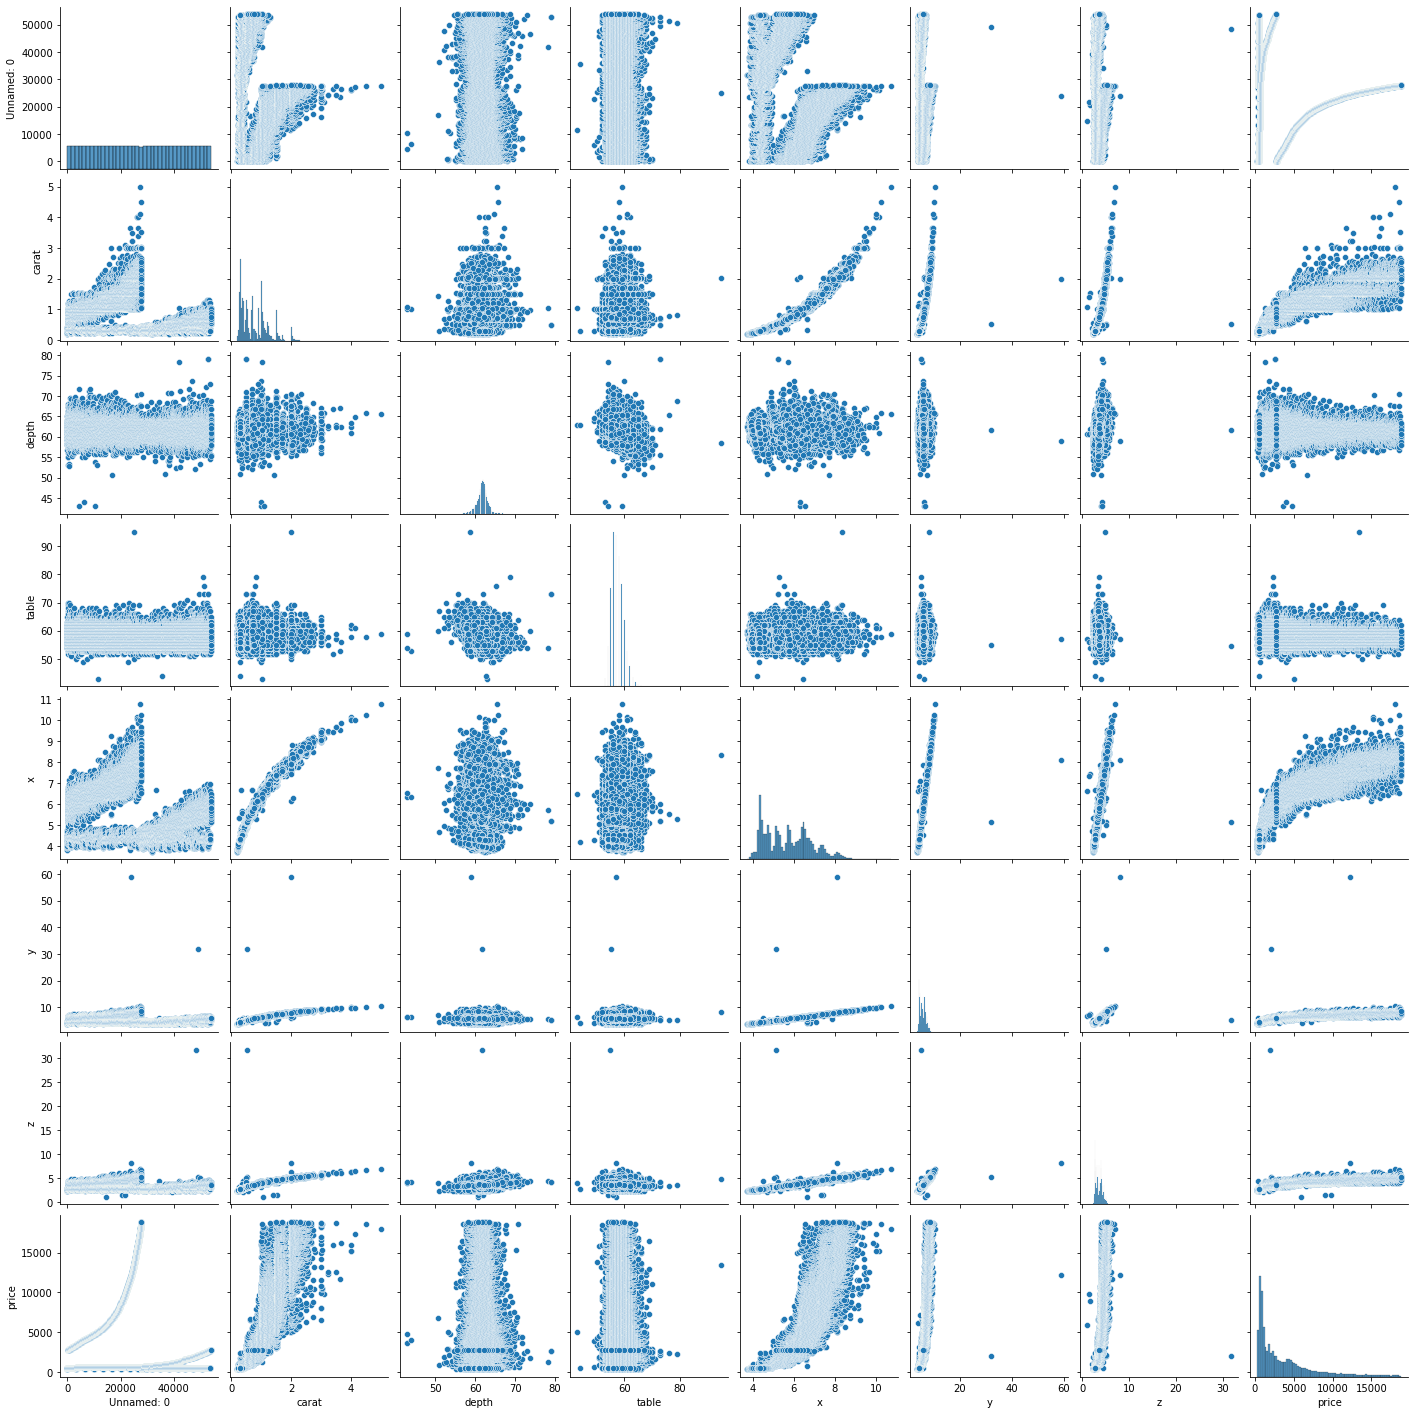

In [11]:
#plot multiple pairwise bivariate distributions (EDA)
sns.pairplot(diamonds_data)

In [12]:
#ordinal encoder for labelled data columns
enc = OrdinalEncoder()
diamonds_data[["cut","color", "clarity"]] = enc.fit_transform(diamonds_data[["cut","color", "clarity"]])

print(diamonds_data)

       Unnamed: 0  carat  cut  color  clarity  depth  table     x     y     z  \
0               1   0.23  2.0    1.0      3.0   61.5   55.0  3.95  3.98  2.43   
1               2   0.21  3.0    1.0      2.0   59.8   61.0  3.89  3.84  2.31   
2               3   0.23  1.0    1.0      4.0   56.9   65.0  4.05  4.07  2.31   
3               4   0.29  3.0    5.0      5.0   62.4   58.0  4.20  4.23  2.63   
4               5   0.31  1.0    6.0      3.0   63.3   58.0  4.34  4.35  2.75   
...           ...    ...  ...    ...      ...    ...    ...   ...   ...   ...   
53935       53936   0.72  2.0    0.0      2.0   60.8   57.0  5.75  5.76  3.50   
53936       53937   0.72  1.0    0.0      2.0   63.1   55.0  5.69  5.75  3.61   
53937       53938   0.70  4.0    0.0      2.0   62.8   60.0  5.66  5.68  3.56   
53938       53939   0.86  3.0    4.0      3.0   61.0   58.0  6.15  6.12  3.74   
53939       53940   0.75  2.0    0.0      3.0   62.2   55.0  5.83  5.87  3.64   

       price  
0        326

<AxesSubplot:>

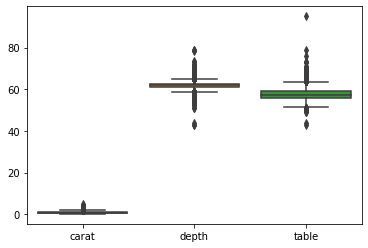

In [13]:
#box plot
data = diamonds_data[['carat', 'depth', 'table']]
#'carat', 'cut', 'color', 'clarity', 'depth', 'table'
sns.boxplot(data=data)

<AxesSubplot:>

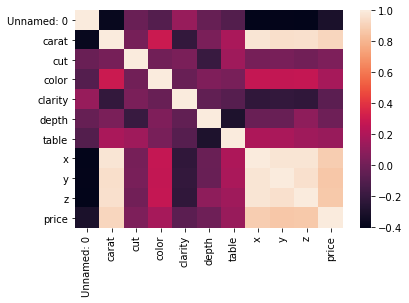

In [14]:
#find pairwise correlation between all columns in the dataframe (EDA)
correlations = diamonds_data.corr()

#heatmap of correlations
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)

In [15]:
#standardize dataframe and split training, testing set to 7/3 ratio (preprocessing)
#random seed as 309
X = diamonds_data[diamonds_data.columns[:-1]]
y = diamonds_data.iloc[:, -1]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=309, test_size=0.3)

In [16]:
#Regressors
regressors = []
names = []

In [17]:
#Linear Regression
#lr_best_param = linear_reg.get_params()
linear_reg = LinearRegression()
#linear_reg.fit(X_train, y_train)
#lr_score = linear_reg.score(X_test, y_test)
#regressors_score.append(lr_score)

regressors.append(linear_reg)
names.append('Linear Regression')

In [18]:
#KNN
#knnr_best_param = knn_reg.get_params()
knn_reg = KNeighborsRegressor()
#knn_reg.fit(X_train, y_train)
#knnr_score = knn_reg.score(X_test, y_test)
#regressors_score.append(knnr_score)

regressors.append(knn_reg)
names.append('KNN Regressor')

In [19]:
#Ridge
#ridge_best_param = ridge_reg.get_params()
ridge_reg = Ridge()
#ridge_reg.fit(X_train, y_train)
#ridge_score = ridge_reg.score(X_test, y_test)
#regressors_score.append(ridge_score)

regressors.append(ridge_reg)
names.append('Ridge')

In [20]:
#Decision Tree Regressor
#dtr_best_param = dt_reg.get_params()
dt_reg = DecisionTreeRegressor()
#dt_reg.fit(X_train, y_train)
#dtr_score = dt_reg.score(X_test, y_test)
#regressors_score.append(dtr_score)

regressors.append(dt_reg)
names.append('DecisionTree Regressor')

In [21]:
#Random Forest Regressor
#rfr_best_param = rf_reg.get_params()
rf_reg = RandomForestRegressor()
#rf_reg.fit(X_train, y_train)
#rfr_score = rf_reg.score(X_test, y_test)
#regressors_score.append(rfr_score)

regressors.append(rf_reg)
names.append('RandomForest Regressor')

In [22]:
#Gradient Boosting Regressor
#gbr_best_param = gb_reg.get_params()
gb_reg = GradientBoostingRegressor()
#gb_reg.fit(X_train, y_train)
#gbr_score = gb_reg.score(X_test, y_test)
#regressors_score.append(gbr_score)

regressors.append(gb_reg)
names.append('GrandientBoosting Regressor')

In [23]:
#SGD Regressor
#sgdr_best_param = sgd_reg.get_params()
sgd_reg = SGDRegressor()
#sgd_reg.fit(X_train, y_train)
#sgdr_score = sgd_reg.score(X_test, y_test)
#regressors_score.append(sgdr_score)

regressors.append(sgd_reg)
names.append('SGD Regressor')

In [24]:
#SVR
#svr_best_param = svr.get_params()
svr = SVR()
#svr.fit(X_train, y_train)
#svr_score = svr.score(X_test, y_test)
#regressors_score.append(svr_score)

regressors.append(svr)
names.append('SVR')

In [25]:
#Linear SVR
#lsvr_best_param = lsvr.get_params()
lsvr = LinearSVR()
#lsvr.fit(X_train, y_train)
#lsvr_score = lsvr.score(X_test, y_test)
#regressors_score.append(lsvr_score)

regressors.append(lsvr)
names.append('Linear SVR')

In [26]:
#MLP Regressor
#mlpr_best_param = mlp_reg.get_params()
mlp_reg = MLPRegressor()
#mlp_reg.fit(X_train, y_train)
#mlpr_score = mlp_reg.score(X_test, y_test)
#regressors_score.append(mlpr_score)

regressors.append(mlp_reg)
names.append('MLP Regressor')

In [27]:
#evaluate each regressors 
results = [['Model', 'MSE', 'RMSE', 'RSE', 'MAE', 'Exec Time']]

#for each model regressor
for i in range(len(regressors)):
    name = names[i]
    regressor = regressors[i]
    start_time = time.time()

    regressor.fit(X_train, y_train)
    y_predict = regressor.predict(X_test)

    mse = round(mean_squared_error(y_test, y_predict, squared=True), 2)
    rmse = round(mean_squared_error(y_test, y_predict, squared=False), 2)
    rse = round(1 - r2_score(y_test, y_predict), 2)
    mae = round(mean_absolute_error(y_test, y_predict), 2)
    end_time = time.time()
    #calculate execution time
    exec_time = round(end_time - start_time, 2)
    results.append([name, mse, rmse, rse, mae, exec_time])

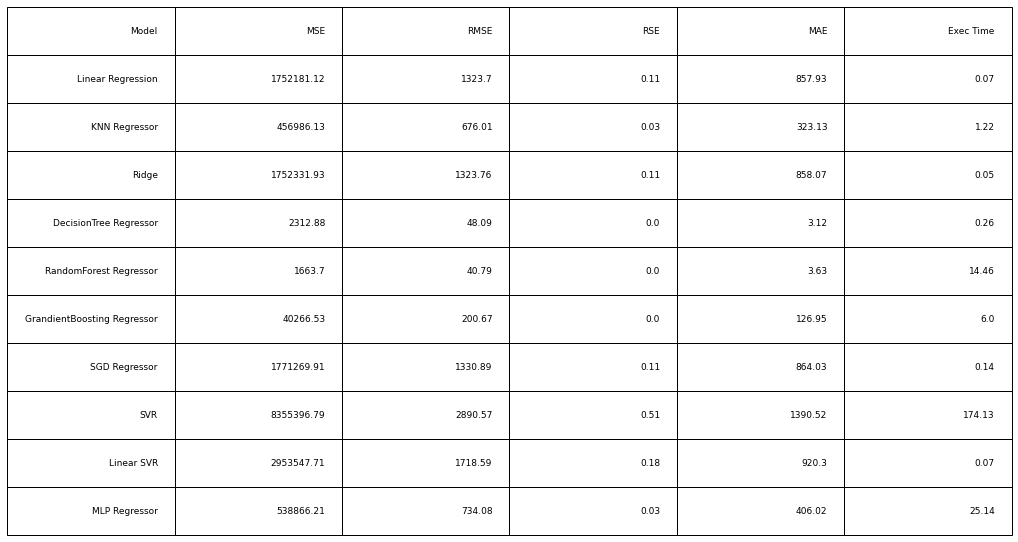

In [28]:
#result table
#https://www.statology.org/matplotlib-table/
#define figure and axes
fig, ax = plt.subplots()

#create table
table = ax.table(cellText=results, loc='center')

#modify table
table.set_fontsize(20)
table.scale(3, 4)
ax.axis('off')

#display table
plt.show()